# Numerical Optimization With Python

*Contributors: Dr Yae GABA; Dr Aurelle TCHAGNA; Mr. Domini LEKO*

## Pre-Course 6: Numerical integration


## Learning objectives:



* Be able to compute the integral of a function numerically in 1D using several different methods


* More practice at developing algorithms, mathematical reasoning, and implementing those algorithms in code


* Understand the concept of the order (of convergence) of an algorithm, and approaches we can use to improve the accuracy of our results

In [9]:
# some imports we will make at the start of every notebook
# later notebooks may add to this with specific SciPy modules

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Numerical integration or Quadrature

[*Quadrature*](https://en.wikipedia.org/wiki/Numerical_integration) is the term used for numerical evaluation of a *definite* (i.e. over a range $[a,b]$) integral, or in 1D finding the area under a curve. 

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f2/Integral_as_region_under_curve.svg" style="width: 400px">

*(Wikipedia: https://upload.wikimedia.org/wikipedia/commons/f/f2/Integral_as_region_under_curve.svg)*

[Npte that we shall use the notation $I$ for this quantity we wish to calculate, although $S$ is used in the figure above].

<br>

If we have a function in 1D, $f(x)$, defined between $a$ and $b$, the *definite* [*integral*](http://en.wikipedia.org/wiki/Integral) over $[a,b]$ is defined as 

$$ I := \int_{a}^{b} f\left ( x \right )\,dx, $$

and its result is the area under the curve. 

Knowing the value of the area under a curve is important to all kinds of applications. 

However, many expressions/functions we may encounter for these curves are difficult to integrate analytically, or the function which governs their shape is unknown to us in closed form.

For example, we may only have data at a finite number of discrete points, perhaps from obervations (cf. one of the interpolation use cases from the last lecture), and thus need to evaluate the integral approximately/numerically. The data may also come from a very expensive numerical model, which has perhaps already been run in advance, and we want to perform quadrature as part of some post-processing calculation.


Recall that a fundamental property of a definite integral is that

\begin{equation}
\int_{a}^{b} f\left ( x \right )dx = \int_{a}^{c} f\left ( x \right )dx + \int_{c}^{b} f\left ( x \right )dx
\end{equation}

where $c$ is a point between $a$ and $b$. 

Therefore, we can equally well perform our integration by splitting the function up into a number of smaller intervals and summing the result of each individual integration over the interval.

If the function is complicated or unknown, we can approximate its value within each of these intervals -- we have now performed a numerical *discretisation* of the function and in this case our associated numerical method to compute the integral is termed a *quadrature* or *numerical integration* method.

As with previous lectures, the choice of approximation method, as well as the size of the intervals, will control the error.  

Better methods as well as smaller (i.e. more to cover our total interval of interest: $[a,b]$) sub-intervals will lead to lower errors, but will generally cost more to compute.

Here the following quadrature methods will be covered in the context of a simple function:

* Midpoint rule
* Trapezoid rule
* Simpson's rule
* Composite Simpson's rule
* Weddle's rule

## Integration example


Let's begin with a simple function to demonstrate some of the most basic methods for performing numerical integration:

$$f\left ( x \right ) := \sin \left ( x \right ),$$

and assume that we want to know what the area under the $\,\sin\,$ function between 0 and $\pi$, i.e. $[a,b]=[0,\pi]$.

The indefinite integral (or anti-derivative) of $\,\sin \left ( x \right )\,$ is of course $\,-\cos \left ( x \right )\,$ (plus a constant of integration, $C$, which we can simply ignore as we saw above as it drops out as soon as we perform a *definite* integral).

Since we know the indefinite integral exactly in this case, we can perform the definite integration (i.e. find the area under the curve) ourselves exactly by hand:

$$I :=  \int_{0}^{\pi} \sin \left ( x \right ) = \left [ -\cos\left ( x \right )+ C \right ]_{0}^{\pi} =-\cos\left ( \pi \right ) - (-\cos\left ( 0 \right )) =-\cos\left ( \pi \right ) + \cos\left ( 0 \right ) = -(-1) + 1 = 2.
$$

[We included the constant $C$ here to just to emphasise again the fact that its presence doesn't matter as it cancels out in all cases - we can legitimately just not write it down in this type of expression.]

Let's start by plotting the function between these points.

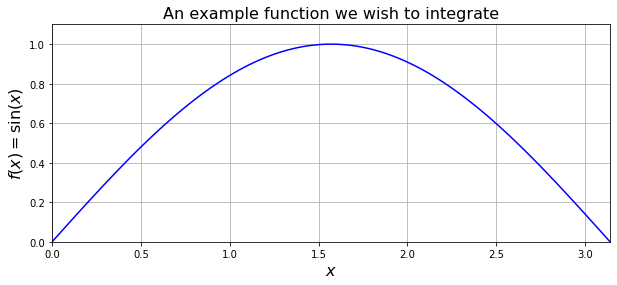

In [2]:
# set up figure
fig = plt.figure(figsize=(10, 4))
ax1 = plt.subplot(111)

# Get the value of pi from numpy and generate 100 equally spaced values from 0 to pi.
x = np.linspace(0, np.pi, 100)

# Calculate sin at these points.
y = np.sin(x)

# plot
ax1.plot(x, y, 'b')

# Set x axis limits between 0 and pi.
ax1.set_xlim([0, np.pi])
ax1.set_ylim([0, 1.1])

# Label axis.
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$f(x)=\sin(x)$', fontsize=16)
ax1.set_title('An example function we wish to integrate', fontsize=16)

# Overlay a grid.
ax1.grid(True);

Now let's investigate the different quadrature rules, finding the area under the curve and seeing how it differs from the true area which we know is 2.

## Rule 1: Midpoint rule

The *midpoint rule* is perhaps the simplest quadrature rule. 

For reasons you will see below it is sometimes also called the *rectangle method*.

Consider one of the subintervals $\,[x_i, x_{i+1}].$

The midpoint rule approximates the integral over this (the $i$-th) subinterval by the area of a rectangle, with a base of length $\,(x_{i+1}-x_i)\,$ and a height given by the value of $\,f(x)\,$ at the midpoint of that interval (i.e. at $\,x=(x_{i+1}+x_i)/2$):

$$ I_M^{(i)} := (x_{i+1}-x_i) \;\; \times \;\; f \left ( \frac {x_{i+1}+x_i} {2} \right ), \;\;\;\;\;\;\text{for}
\;\;\;\;\;\; 0\le i \le n-1.$$

The midpoint estimate of $I$ then simply involves summing up over all the subintervals:

$$I_M := \sum_{i=0}^{n-1} \, f \left ( \frac {x_{i+1}+x_i} {2} \right )\, (x_{i+1}-x_i).$$

Let's write some code to plot the idea as well as compute an estimate of the integral using the midpoint rule.



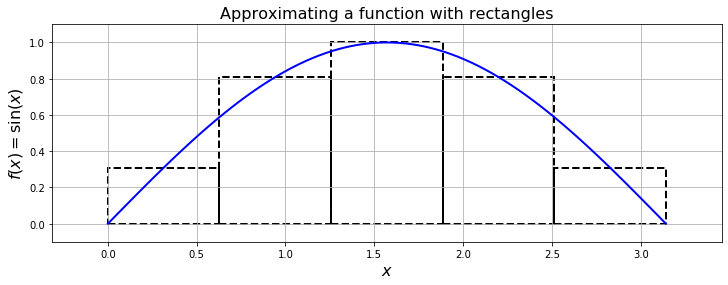

The sum of the areas of the rectangles is (I_M): 2.033281476926


In [18]:
# this is a matplotlib function that allows us to easily plot rectangles
# which will be useful for visualising what the midpoint rule does
from matplotlib.patches import Rectangle


def f(x):
    """The function we wish to integrate"""
    return np.sin(x)


# Get the value of pi from numpy and generate equally spaced values from 0 to pi.
x = np.linspace(0, np.pi, 100)
y = f(x)

# plot
fig = plt.figure(figsize=(12, 4))
ax1 = plt.subplot(111)
ax1.plot(x, y, 'b', lw=2)

ax1.margins(0.1)

# Label axis.
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$f(x)=\sin(x)$', fontsize=16)
ax1.set_title('Approximating a function with rectangles', fontsize=16)

# Overlay a grid.
ax1.grid(True)

number_intervals = 5
xi = np.linspace(0, np.pi, number_intervals+1)
I_M = 0.0
for i in range(number_intervals):
    ax1.add_patch(Rectangle((xi[i], 0.0), (xi[i+1] - xi[i]),
                            f((xi[i+1]+xi[i])/2), fill=False, ls='--', color='k', lw=2))
    I_M += f((xi[i+1]+xi[i])/2)*(xi[i+1] - xi[i])

# use an explicit show here to force the figure to appear before the following print.
plt.show()
print('The sum of the areas of the rectangles is (I_M): {:.12f}'.format(I_M))

Note that in what follows we assume that we have been given the function $f(\cdot)$ such that we can evaluate it anywhere. However, this comes at a cost ($f$ could be incredibly complex and expensive to evaluate just once) and so in our quadrature methods we want good accuracy without excessive numbers of function evaluations.

The result of the integration over the entire interval of interest is then just the sum of the integrals over all the sub-intervals, i.e. the sum of the areas of all the small rectanges. 

A complex example looks like this, where the red line shows the original function we wish to compute the integral of, and the blue rectangles *approximate* the area under that function for a number of sub-intervals:

<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Integration_rectangle.svg/340px-Integration_rectangle.svg.png" width="600">

## Implementing a midpoint rule function

Clearly the sum of the areas of all the rectangles provides an estimate of the true integral. In the case above we observe an error of around 1.5%.

[Note that the SciPy module features many different integration functions, and you can find thorough documentation for these functions (including methods not covered in this course) [here](http://docs.scipy.org/doc/scipy/reference/integrate.html). This library does not contain a function for the midpoint rule, but it is trivial to create our own.]

As we are going to compare different rules below, let's implement a midpoint rule function.

In [4]:
def midpoint_rule(a, b, function, number_intervals=10):
    """ Our implementation of the midpoint quadrature rule.
    
    a and b are the end points for our interval of interest.
    
    'function' is the function of x \in [a,b] which we can evaluate as needed.
    
    number_intervals is the number of subintervals/bins we split [a,b] into.
    
    Returns the integral of function(x) over [a,b].
    """
    interval_size = (b - a)/number_intervals

    # Some examples of some asserts which might be useful here - 
    # you should get into the habit of using these sorts of checks as much as is possible/sensible.
    assert interval_size > 0
    assert type(number_intervals) == int
    
    # Initialise to zero the variable that will contain the cumulative sum of all the areas
    I_M = 0.0
    
    # Find the first midpoint -- i.e. the centre point of the base of the first rectangle
    mid = a + (interval_size/2.0)
    # and loop until we get past b, creating and summing the area of each rectangle
    while (mid < b):
        # Find the area of the current rectangle and add it to the running total
        # this involves an evaluation of the function at the subinterval midpoint
        I_M += interval_size * function(mid)
        # Move the midpoint up to the next centre of the interval
        mid += interval_size

    # Return our running total result
    return I_M

# check the function runs and agrees with our first version used to generate the schematic plot of the method above:
print('midpoint_rule(0, np.pi, np.sin, number_intervals=5) = ', midpoint_rule(0, np.pi, np.sin, number_intervals=5))

midpoint_rule(0, np.pi, np.sin, number_intervals=5) =  2.033281476926104


In [5]:
# Now let's test the midpoint function. 
print("The exact area found by direct integration = 2")
for i in (1, 2, 10, 100, 1000):
    area = midpoint_rule(0, np.pi, np.sin, i)
    print("Area %d rectangle(s) = %g (error=%g)"%(i, area, abs(area-2)))

The exact area found by direct integration = 2
Area 1 rectangle(s) = 3.14159 (error=1.14159)
Area 2 rectangle(s) = 2.22144 (error=0.221441)
Area 10 rectangle(s) = 2.00825 (error=0.00824841)
Area 100 rectangle(s) = 2.00008 (error=8.22491e-05)
Area 1000 rectangle(s) = 2 (error=8.22467e-07)


## Observations


- With one rectangle, we are simply finding the area of a box of shape $\pi\, \times$ 1 ($\pi$ is the width of the rectangle and $1$ is the value of the function evaluated at the midpoint, $\pi/2$), so of course the result is $\pi$. 


- As we increase the number of subintervals, or rectangles, we increase the accuracy of our area.


- We can observe from the slope of the log-log plot of error against number of subintervals that the error is a quadratic function of the inverse of the number of subintervals (or equivalently is quadratically dependent on the spacing between the points - the interval size). 


- This demonstrates that (for this particular example at least), the method demonstrates second-order accuracy - if we halve the interval size the error goes down by a factor of 4!


- The simplicity of this method is its weakness, as rectangles (i.e. a flat top) are rarely a good approximation for the shape of a smooth function. 


- We want to use as few shapes as possible to approximate our function, because each additional rectangle is one extra time round the loop, which includes its own operations as well as an extra evaluation of the function, and hence increases the overall computational cost. 


- Instead, let's consider another shape that follows the profile a little better ...

## <span style="color:blue">Exercise 6.1: Midpoint rule convergence plot</span>

Plot the log-log plot mentioned above.

## Rule 2: Trapezoid rule

If we change the shape of the rectangle to a trapezoid (i.e. the top of the shape now being a linear line fit defined by the values of the function at the two end points of the subinterval, rather than the constant value used in the midpoint rule), we arrive at the trapezoid, or trapezoidal, rule. 

The trapezoid rule approximates the integral by the area of a trapezoid with base $(x_{i+1}-x_i)$ and the left- and right-hand-sides equal to the values of the function at the two end points.  

In this case the area of the shape approximating the integral over one subinterval, is given by:

$$I_T^{(i)} := (x_{i+1}-x_i) \;\; \times \;\; 
\left( \frac {f\left ( x_{i+1}\right ) + f \left (x_{i} \right )} {2} \right)
\;\;\;\;\;\;\text{for}
\;\;\;\;\;\; 0\le i \le n-1.$$

The trapezoidal estimate of $I$ then simply involves summing up over all the subintervals:

$$I_T := \sum_{i=0}^{n-1}\,   \left(\frac{f(x_{i+1}) + f(x_{i})}{2}\right )\, (x_{i+1}-x_i). $$

Let's write some code to plot the idea and compute an estimate of the integral.

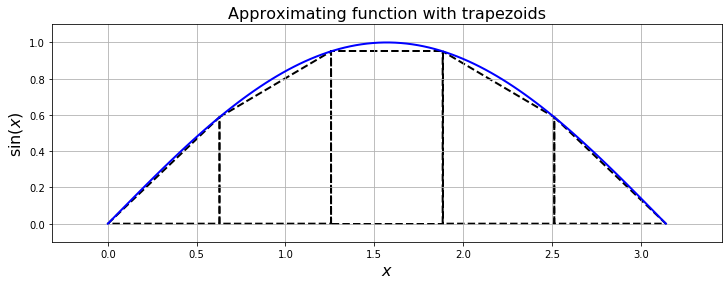

The sum of the areas of the trapezoids is (I_T): 1.933765598093


In [6]:
# this is a matplotlib function that allows us to plot polygons
from matplotlib.patches import Polygon


def f(x):
    """The function we wish to integrate"""
    return np.sin(x)


# Get the value of pi from numpy and generate equally spaced values from 0 to pi.
x = np.linspace(0, np.pi, 100)
y = f(x)

# plot
fig = plt.figure(figsize=(12, 4))
ax1 = plt.subplot(111)
ax1.plot(x, y, 'b', lw=2)

ax1.margins(0.1)

# Label axis.
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$\sin(x)$', fontsize=16)
ax1.set_title('Approximating function with trapezoids', fontsize=16)

# Overlay a grid.
ax1.grid(True)

number_intervals = 5
xi = np.linspace(0, np.pi, number_intervals+1)
I_T = 0.0
for i in range(number_intervals):
    ax1.add_patch(Polygon(np.array([[xi[i], 0], [xi[i], f(xi[i])], [
                  xi[i+1], f(xi[i+1])], [xi[i+1], 0]]), closed=True, fill=False, ls='--', color='k', lw=2))
    I_T += ((f(xi[i+1]) + f(xi[i]))/2)*(xi[i+1] - xi[i])

plt.show()
print('The sum of the areas of the trapezoids is (I_T): {:.12f}'.format(I_T))

For our pictorial example used above the approximation looks like it should be more accurate than the midpoint rule:

<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/0/03/Integration_trapezoid.svg/340px-Integration_trapezoid.svg.png" width="600">

the tops of the shapes (now trapezoids) are approximating the variation of the function with a linear function, rather than a flat (constant) function.  This looks like it should give more accurate results, but see below.

Note that numpy has a function for the trapezoid rule, <a href="http://docs.scipy.org/doc/numpy/reference/generated/numpy.trapz.html">numpy.trapz</a>, but we'll make our own that works in a similar way to our midpoint rule function.

## <span style="color:blue">Exercise 6.2: Complete the implementation of the trapezoid rule below</span>

Test your function in a similar way to above,  compute another log-log plot of the error and compare with the midpoint rule.

In [ ]:
print("The exact area found by direct integration = 2")
for i in (1, 2, 10, 100, 1000):
    area = trapezoidal_rule(0, np.pi, np.sin, i)
    print("Area %d trapezoid(s) = %g (error=%g)"%(i, area, abs(area-2)))

You should have found the following errors:

`The area found by direct integration = 2`

`Area 1 trapezoid(s) = 1.92367e-16 (error=2)`

`Area 2 trapezoid(s) = 1.5708 (error=0.429204)`

`Area 10 trapezoid(s) = 1.98352 (error=0.0164765)`

`Area 100 trapezoid(s) = 1.99984 (error=0.000164496)`

`Area 1000 trapezoid(s) = 2 (error=1.64493e-06)`

## Error analysis

Another observation here is that in this particular case of half a sine wave, the trapezoid rule always *under-estimates* the area, whereas the midpoint rule *over-estimates*. 

Perhaps most surprisingly, the midpoint rule is more accurate than the trapezoid rule - the reason for this is not immediately obvious from the discussions and the images above.

The accuracy of a quadrature rule is predicted by examining its behaviour in practice with *polynomials*. 

We say that the **degree of precision** of a quadrature rule is equal to $M$ if it is exact for all polynomials of degree up to and including $M$, but not exact for some polynomial of degree $M+1$.

Clearly both the midpoint and trapezoid rules will give the exact result for both constant and linear functions,

but they are not exact for quadratics [you could test our codes yourself on the function $x^2$ to demonstrate this].

Therefore, they have a degree of precision of 1.

For the "concave-down" (i.e. the first half of a sine wave) function we chose above, notice from the plot that the trapezoidal rule will **consistently underestimate** the area under the curve, as the line segments approximating the function are always under the concave function curve.

In contrast, the mid-point rule will have parts of each rectangle above and below the curve, hence to a certain extent the **errors will cancel** each other out. 

This is why, *for this particular example*, the errors in the mid-point rule turn out to be approximately half those in the trapezoidal rule.  

While this result turns out to be *generally* true for smooth functions, we can always come up with (counter) examples where the trapezoid rule will win (can you think of an example?).

Taylor series analysis can be used to formally construct upper bounds on the quadrature error for both methods. 

We know that the error when integrating constant and linear functions is zero for our two rules, so let's first consider an example of integrating a quadratic polynomial.

We know analytically that

$$\int_{0}^{1} x^{2}\,dx = \left.\frac{1}{3}x^3\right|_0^1=\frac {1}{3}.$$

Numerically, the midpoint rule on a single interval gives

\begin{equation}
I_M = 1 \left(\frac {1}{2}\right)^{2} = \frac {1}{4},
\end{equation}

while the trapezoidal rule gives

\begin{equation}
I_T = 1 \frac {0^2+1^{2}}{2} = \frac {1}{2}.
\end{equation}

The error for $I_M$ is therefore $1/3 - 1/4 = 1/12$, while the error for $I_T$ is $1/3 - 1/2 = -1/6$.

Therefore, the midpoint rule is twice as accurate as the trapezoid rule:

$$|E_M| = \frac{1}{2} |E_T|,$$

where $|E|$ indicates the error (the absolute value of the difference from the exact solution).

This is the case for this simple example, and we can see from the actual error values printed above that it also appears to be approximately true for the sine case (which is not a simple polynomial) as well.

We will use this knowledge to generate new more accurate rules below, but first let's sketch how you can go about a more rigorous analysis/estimation of errors.

## Rule 3: Simpson's rule

Knowing the error estimates from the two rules explored so far opens up the potential for us to combine them in an appropriate manner to create a new quadrature rule, generally more accurate than either one separately. 

Suppose $I_S$ indicates an unknown, but more accurate, estimate of the integral over an interval.  

Then, as seen above, as $I_T$ has an error that is approximately $-2$ times the error in $I_M$, the following relation must hold approximately:


$$I_S - I_T \approx -2 \left ( I_S - I_M\right ).$$


This follows from the fact that $\,I - I_T \approx -2 \left ( I - I_M\right )$, provided that $I_S$ is closer to $I$ than either of the other two estimates.

Replacing this approximately equals sign with actual equality defines $I_S$ for us in terms of things we know. 

We can rearrange this to give an expression for $I_S$ that yields a more accurate estimate of the integral than either $I_M$ or $I_T$:

$$I_S := \frac{2}{3}I_M + \frac{1}{3}I_T.$$

What we're doing here is using the fact that we know something about (the *leading order* behaviour of the) two errors, and we can therefore combine them to cancel this error to a certain extent.

This estimate will generally be more accurate than either $M$ or $T$ alone. The error won't actually be zero in general as we're only cancelling out the leading order term in the error, but a consequence is that we will be left with higher-degree terms in the error expansion of the new quadrature rule which should be smaller (at least in the asymptotic limit), and converge faster. 

The resulting quadrature method in this case is known as [Simpson's rule](http://en.wikipedia.org/wiki/Simpson%27s_rule):

\begin{align*}
I_S &:= \frac{2}{3}I_M + \frac{1}{3}I_T \\[5pt]
&= \frac{2}{3}  (b-a)f\left ( \frac{a+b}{2}\right ) + \frac{1}{3}(b-a)\frac{(f(a) + f(b))}{2} \\[5pt]
& = \frac{(b-a)}{6}\left( f \left ( a\right ) + 4f \left ( c\right ) + f\left ( b\right )\right),
\end{align*}

where $a$ and $b$ are the end points of an interval and $c = \left ( a+b\right )/2$ is the midpoint.


Note that an alternate derivation of the same rule involves fitting a *quadratic function* (i.e. $P_2(x)$ rather than the constant and linear approximations already considered) that interpolates the integral at the two end points of the interval, $a$ and $b$, as well as at the midpoint, $c = \left ( a+b\right )/2$, and calculating the integral under that polynomial approximation.

See the homework exercise, and note that we'll come back to this idea a bit later when we introduce the Newton-Cotes family of quadrature rules.

Let's plot what this method is doing and compute the integral for our sine case.

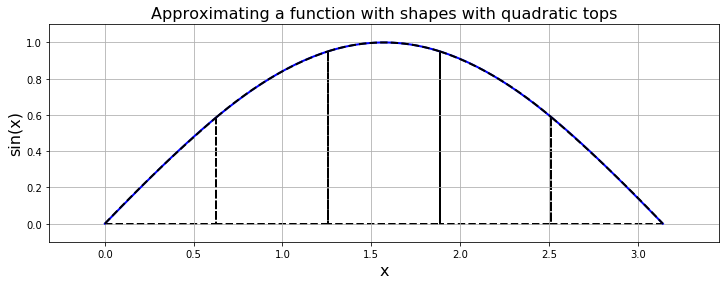

The Simpson's rule approximation (I_S): 2.000109517315


In [30]:
# this is a matplotlib function that allows us to plot polygons
# use this to plot the straight sides, and add an approximate
# quadratic at the top.
from matplotlib.patches import Polygon

def f(x):
    """The function we wish to integrate"""
    return np.sin(x)

# Get the value of pi from numpy and generate equally spaced values from 0 to pi.
x = np.linspace(0, np.pi, 100)
y = f(x)

# plot
fig = plt.figure(figsize=(12, 4))
ax1 = plt.subplot(111)
ax1.plot(x, y, 'b', lw=2)

ax1.margins(0.1)

# Label axis.
ax1.set_xlabel('x', fontsize=16)
ax1.set_ylabel('sin(x)', fontsize=16)
ax1.set_title('Approximating a function with shapes with quadratic tops', fontsize=16)

# Overlay a grid.
ax1.grid(True)

number_intervals = 5
xi = np.linspace(0, np.pi, number_intervals+1)

I_S = 0.0

for i in range(number_intervals):
    # use a non-closed Polygon to visualise the straight sides of each interval 
    ax1.add_patch(Polygon(np.array([[xi[i], f(xi[i])], [xi[i], 0], [xi[i+1], 0], [xi[i+1], f(xi[i+1])]]),
                          closed=False, fill=False, ls='--', color='k', lw=2))
    # add the quadratic top - fit a quadratic using numpy polyfit - yields the exact quadratic 
    # that passes through the three points
    poly_coeffs = np.polyfit((xi[i], (xi[i] + xi[i+1])/2.0, xi[i + 1]),
                            (f(xi[i]), f((xi[i] + xi[i+1])/2.0), f(xi[i+1])), 2)
    # turn the polynomial coefficient into a polynomial function we can evaluate
    p2 = np.poly1d(poly_coeffs)
    # and plot this quadratic over the sub-interval using 20 plotting points within the 
    # interval to give a smooth curve 
    ax1.plot(np.linspace(xi[i], xi[i+1], 20),
             p2(np.linspace(xi[i], xi[i+1], 20)), ls='--', color='k', lw=2)
    # add in the area of the interval shape to our running total using Simpson's formula
    I_S += ((xi[i+1] - xi[i])/6.) * (f(xi[i]) + 4 *
                                     f((xi[i] + xi[i+1])/2.0) + f(xi[i+1]))

plt.show()
print("The Simpson's rule approximation (I_S): {:.12f}".format(I_S))

It looks like a much closer fit to the function:

<img src="http://upload.wikimedia.org/wikipedia/commons/5/50/Integration_simpson.png" width="600">

Let's make a function to test it out...

## <span style="color:blue">Exercise 6.3: Implementing Simpson's rule</span>

Complete an implementation of Simpson's rule and test it on our sine function.

In [ ]:
def simpsons_rule(a, b, function, number_intervals=10):
    """ Function to evaluate Simpson's rule. 
    
    Note that this implementation takes the function as an argument, 
    and evaluates this at the midpoint of subintervals in addition to the 
    end point. Hence additional information is generated and used through 
    additional function evaluations. 
    
    This is different to the function/implementation available with SciPy  
    where discrete data only is passed to the function. 
    
    Bear this in mind when comparing results - there will be a factor of two
    in the definition of "n" we need to be careful about!
    
    Also note that this version of the function performs redundant function 
    evaluations - see the **composite** implementation below.
    """

    # Add your code here!
        

In [ ]:
print("The area found by direct integration = 2")
for i in (1, 2, 10, 100, 1000):
    area = simpsons_rule(0, np.pi, np.sin, i)
    print("Area %d rectangle(s) = %g (error=%g)"%(i, area, abs(area-2)))

You should find:

`The area found by direct integration = 2`

`Area 1 rectangle(s) = 2.0944 (error=0.0943951)`

`Area 2 rectangle(s) = 2.00456 (error=0.00455975)`

`Area 20 rectangle(s) = 2 (error=4.23093e-07)`

`Area 200 rectangle(s) = 2 (error=4.228e-11)`

`Area 2000 rectangle(s) = 2 (error=2.22045e-15)`

For this simple function you should find far smaller errors, and which drop much more rapidly with smaller $h$ (or more sub-intervals).


## Observations


- The errors are lower than for the midpoint and trapezoidal rules, and the method converge more rapidly - i.e. the relative improvement only gets better for more subintervals.


- This expression now integrates up to cubics exactly (by construction), so it is of order 4 (as confirmed by the convergence plot above).


- We're getting down to errors close to machine precision now when we use 1000 subintervals. But remember we may well either have a relatively small number of data points, or want to minimise the number of function evaluations well below this relatively high number. This will mean that for problems with lots of variation, and/or in higher dimensions, that we still work to do in improving our quadrature methods.


- As was the case with our first Trapezoidal implementation, we are performing unnecessary function evaluations here; we can fix this issue through the implementation of a so-called *composite* version of the rule.

## Rule 4: Composite Simpson's Rule


If we assume that our interval $[a,b]$ has been split up into $n$ intervals (or $n+1$ data points) we can save some function evaluations by writing Simpson's Rule in the following form (note here we do not introduce any additional midpoint function evaluations)

\begin{align*}
I_{S} 
& = \frac{\Delta x}{3}\left[ f \left ( x_0\right ) + 4f \left ( x_1\right ) + 2f\left ( x_2\right ) + 4f \left ( x_3\right ) + \cdots + 2 f \left ( x_{n-2}\right )  + 4 f \left ( x_{n-1}\right ) +  f \left ( x_{n}\right ) \right]\\[5pt]
& = \frac{\Delta x}{3}\left[ f \left ( x_0\right ) + 2\sum_{i=1}^{n/2 - 1} f\left(x_{2i}\right) + 4\sum_{i=1}^{n/2} f\left(x_{2i-1}\right)  +  f \left ( x_{n}\right ) \right].
\end{align*}

This is known as the [Composite Simpson's rule](http://en.wikipedia.org/wiki/Simpson%27s_rule#Composite_Simpson.27s_rule), 
or more precisely the *composite Simpson's 1/3 rule*.

This is the version of Simpson's rule implemented by Scipy [`scipy.interpolate.simps`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simps.html).


Note that this way of formulating Simpson's rule (where we do not allow additional function evaluations at the midpoints of intervals - we assume we are only in a position to use the given data points) requires that $n$ be even.

This way of writing the composite form in the case of $n=2$ is equivalent to the formula over $[a,b]$ that introduced the additional midpoint location $c$.

In [24]:
def simpsons_composite_rule(a, b, function, number_intervals=10):
    """Function to evaluate the composite Simpson's rule only using
    function evaluations at (number_intervals + 1) points.
    
    This implementation requires that the number of subintervals (number_intervals) be even
    """
    assert number_intervals % 2 == 0, "number_intervals is not even"

    interval_size = (b - a) / number_intervals
    # start with the two end member values
    I_cS2 = function(a) + function(b)

    # add in those terms with a coefficient of 4
    for i in range(1, number_intervals, 2):
        I_cS2 += 4 * function(a + i * interval_size)

    # and those terms with a coefficient of 2
    for i in range(2, number_intervals-1, 2):
        I_cS2 += 2 * function(a + i * interval_size)

    return I_cS2 * (interval_size / 3.0)

In [25]:
print("The area found by direct integration = 2")
for i in (2, 10, 100, 1000):
    area = simpsons_composite_rule(0, np.pi, np.sin, i)
    print("Area %d rectangle(s) = %g (error=%g)"%(i, area, abs(area-2)))

The area found by direct integration = 2
Area 2 rectangle(s) = 2.0944 (error=0.0943951)
Area 10 rectangle(s) = 2.00011 (error=0.000109517)
Area 100 rectangle(s) = 2 (error=1.08245e-08)
Area 1000 rectangle(s) = 2 (error=1.07869e-12)


This is a slight improvement for a simple function like $\sin$, but will be much more of an improvement for functions which oscillate more, in a relative sense compared to the size of our bins. 

## Rule 5: Weddle's rule

We noted above that Simpson's rule is fourth-order accurate.

Suppose we take an approximation to $I$ using $n$ intervals with Simpson's rule and call the result $I_S$, and then apply Simpson's rule with double the number of intervals ($2n$) and call the result $I_{S_2}$. 

Then we have two estimates for the integral where we expect $I_{S_2}$ to be approximately $2^4=16$ times more accurate than $S$. In particular, we expect the lowest (i.e. the leading) order error term in $I_{S_2}$ to be precisely one sixteenth that of $I_S$.

Similar to how we derived Simpson's rule by combining what we knew of the error for the midpoint and trapezoidal rules, with this knowledge we can combine the two estimates from Simpson's rule to derive an even more accurate estimate of $I$:

Let's call this more accurate rule $I_W$, which we can find by solving:

$$I_W - I_S = 16 \left ( I_W - I_{S_2} \right ),$$

for $I_W$.

A bit of manipulation:

\begin{align*}
& \;\;\; I_W - I_S = 16 \left ( I_W - I_{S_2} \right ) \\[5pt]
\implies & \;\;\; I_W - I_S = 16 I_W - 16 I_{S_2} \\[5pt]
\implies & \;\;\; 15 I_W  = 16 I_{S_2} - I_S \\[5pt]
\implies & \;\;\; 15 I_W  = 15 I_{S_2} + (I_{S_2} - I_S) ,
\end{align*}

leads us to the expression

$$ I_W = I_{S_2} + \frac {\left (I_{S_2} - I_S \right )}{15}.$$

This is known as *Weddle's rule*, or the *extrapolated Simpson's rule* because it uses two different values for the interval size and *extrapolates* from these two to obtain an even more accurate result. 

Making a function for this rule is easy as we can just call our Simpson's rule functions with two values for the number of intervals.


## <span style="color:blue">Exercise 6.4: Implementing Weddle's rule</span>

Write a function which implements Weddle's rule using appropriate calls to the simpsons and simpsons_composite functions written above.

Ultimately you should be able to generate a comparison image that looks something like this:


<img src="./images/weddle_convergence.png" width=500x>

## Aside: (Richardson) extrapolation, Romberg integration and Newton-Cotes formula

Note that the above technique of using the same rule, but with different values for the interval size, $h$, to derive a more accurate estimate of the integral is an example of what is more generally called *Richardson extrapolation*.  

Performing this approach using the trapezoid rule as the starting point leads to what is termed *Romberg integration*.

Taking the idea behind Simpson's rule which fit a quadratic Lagrange interpolating polynomial to *equally spaced* points in the interval, end extending to any order Lagrange polynomial leads to the [*Newton-Cotes* family of quadrature rules](https://en.wikipedia.org/wiki/Newton%E2%80%93Cotes_formulas).

Note finally, that even wider families exist where the function being integrated is evaluated at non-equally-spaced points.

And of course for practical application these ideas need to be extended to more than one dimension.